In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_excel('p1-customers.xlsx')
df = df.join(pd.get_dummies(df['Customer_Segment']))

In [81]:
customer_segment_map = dict()
i = 1
for entry in pd.unique(df['Customer_Segment']):
    customer_segment_map[i] = entry
    i += 1
print(customer_segment_map)

{1: 'Store Mailing List', 2: 'Loyalty Club and Credit Card', 3: 'Loyalty Club Only', 4: 'Credit Card Only'}


In [82]:
customer_segment_map

{1: 'Store Mailing List',
 2: 'Loyalty Club and Credit Card',
 3: 'Loyalty Club Only',
 4: 'Credit Card Only'}

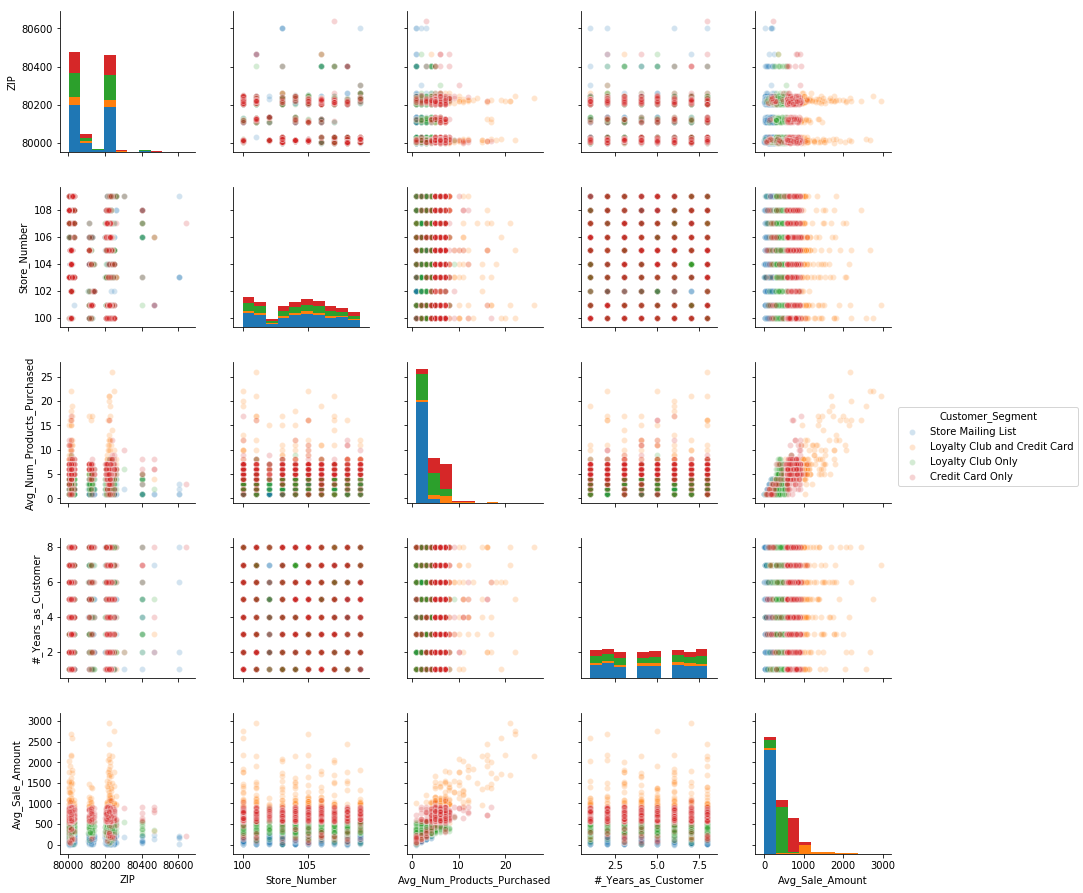

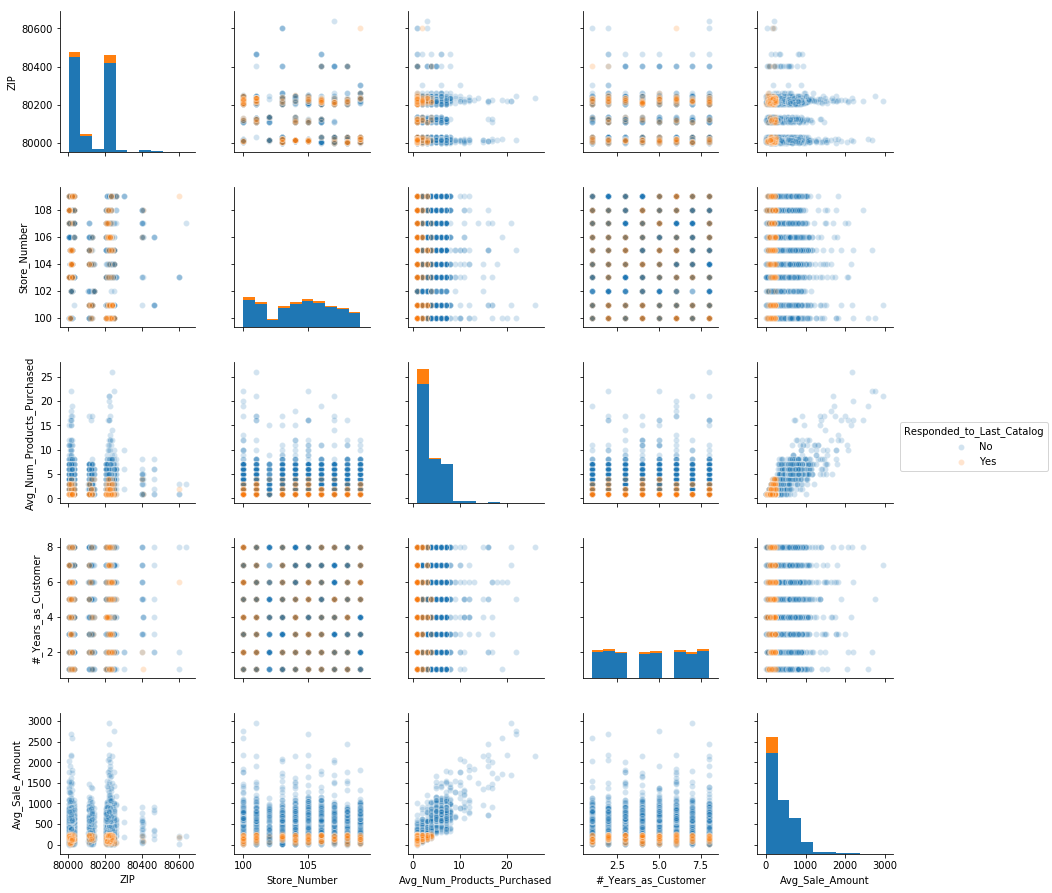

In [16]:
sns.pairplot(df[['Customer_Segment', 'City', 'ZIP', 
                 'Store_Number', 
                 'Responded_to_Last_Catalog', 'Avg_Num_Products_Purchased',
                 '#_Years_as_Customer', 'Avg_Sale_Amount']], 
             hue='Customer_Segment', plot_kws={'alpha': 0.2})
sns.pairplot(df[['Customer_Segment', 'City', 'ZIP', 
                 'Store_Number', 
                 'Responded_to_Last_Catalog', 'Avg_Num_Products_Purchased',
                 '#_Years_as_Customer', 'Avg_Sale_Amount']], 
             hue='Responded_to_Last_Catalog', plot_kws={'alpha': 0.2})

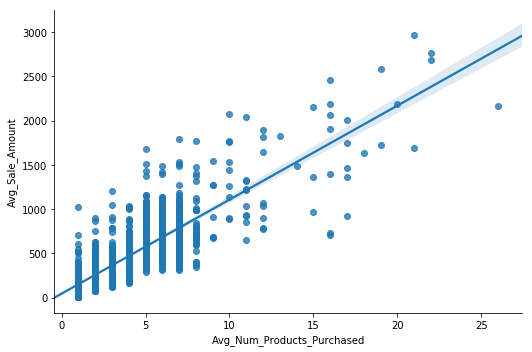

In [4]:
sns.lmplot(data=df, x='Avg_Num_Products_Purchased', y='Avg_Sale_Amount', aspect=1.5)

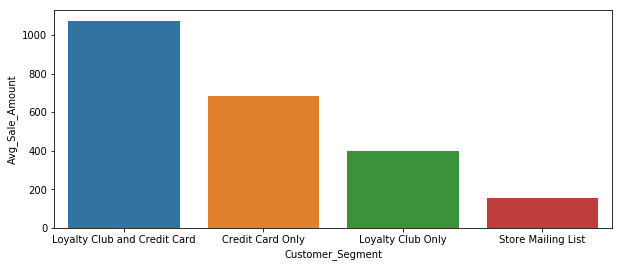

In [5]:
plt.figure(figsize=(10,4))
sns.barplot(data=df, x='Customer_Segment', y='Avg_Sale_Amount', order=['Loyalty Club and Credit Card',
                                                                       'Credit Card Only',
                                                                       'Loyalty Club Only',
                                                                       'Store Mailing List'],
           estimator=np.mean, ci=None)

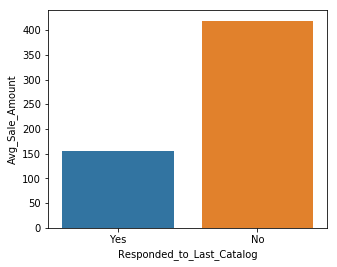

In [6]:
plt.figure(figsize=(5,4))
sns.barplot(data=df, x='Responded_to_Last_Catalog', y='Avg_Sale_Amount', ci=None, order=['Yes','No'])

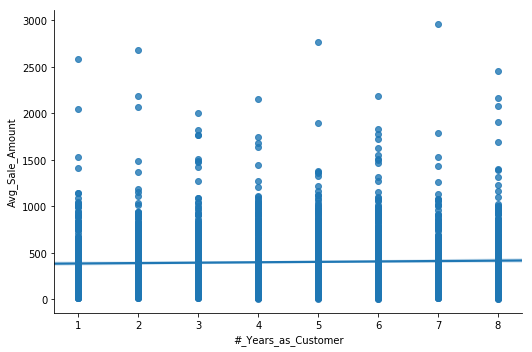

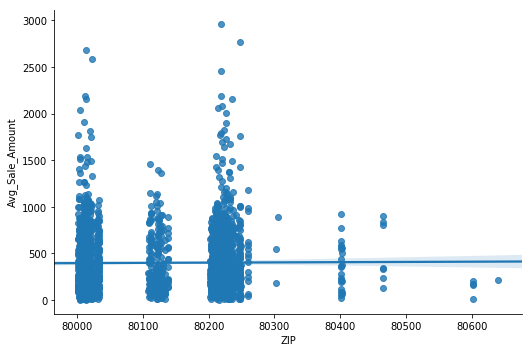

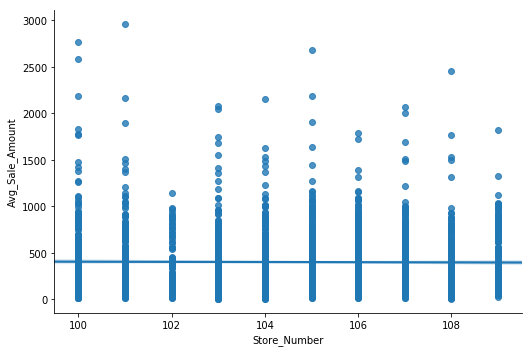

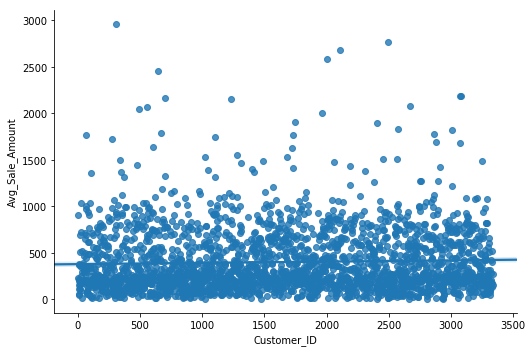

In [7]:
sns.lmplot(data=df, x='#_Years_as_Customer', y='Avg_Sale_Amount', aspect=1.5)
sns.lmplot(data=df, x='ZIP', y='Avg_Sale_Amount', aspect=1.5)
sns.lmplot(data=df, x='Store_Number', y='Avg_Sale_Amount', aspect=1.5)
sns.lmplot(data=df, x='Customer_ID', y='Avg_Sale_Amount', aspect=1.5)

In [64]:
df = pd.read_excel('p1-customers.xlsx')
df = df.join(pd.get_dummies(df['Customer_Segment']))
# Replace Customer_Segment with mapped number
# df['Customer_Segment'] = df['Customer_Segment'].apply(lambda x: customer_segment_map.keys()[customer_segment_map.values().index(x)])
df['Responded_to_Last_Catalog'] = df['Responded_to_Last_Catalog'].apply(lambda x: 1 if x == 'Yes' else 0)
df.head()

,Name,Customer_Segment,Customer_ID,Address,City,State,ZIP,Avg_Sale_Amount,Store_Number,Responded_to_Last_Catalog,Avg_Num_Products_Purchased,#_Years_as_Customer,Credit Card Only,Loyalty Club Only,Loyalty Club and Credit Card,Store Mailing List
0,Pamela Wright,Store Mailing List,2,376 S Jasmine St,Denver,CO,80224,227.90,100,0,1,6,0,0,0,1
1,Danell Valdez,Store Mailing List,7,12066 E Lake Cir,Greenwood Village,CO,80111,55.00,105,1,1,6,0,0,0,1
2,Jessica Rinehart,Store Mailing List,8,7225 S Gaylord St,Centennial,CO,80122,212.57,101,0,1,3,0,0,0,1
3,Nancy Clark,Store Mailing List,9,4497 Cornish Way,Denver,CO,80239,195.31,105,1,1,6,0,0,0,1
4,Andrea Brun,Store Mailing List,10,2316 E 5th Ave,Denver,CO,80206,110.55,100,1,1,2,0,0,0,1


In [65]:
df[['Customer_Segment', 
           'Credit Card Only',
          'Loyalty Club Only',
          'Loyalty Club and Credit Card',
          'Store Mailing List']].drop_duplicates()

,Customer_Segment,Credit Card Only,Loyalty Club Only,Loyalty Club and Credit Card,Store Mailing List
0,Store Mailing List,0,0,0,1
1108,Loyalty Club and Credit Card,0,0,1,0
1302,Loyalty Club Only,0,1,0,0
1881,Credit Card Only,1,0,0,0


In [116]:
feature_names = ['Loyalty Club Only',
                 'Loyalty Club and Credit Card',
                 'Store Mailing List',
                 'Avg_Num_Products_Purchased']
features = df[feature_names]
labels = df['Avg_Sale_Amount']

In [117]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.3, random_state=42)

In [118]:
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [119]:
reg.coef_

array([-153.36054551,  285.7386439 , -244.910896  ,   69.24931075])

In [120]:
y_pred = reg.predict(X_test)

In [131]:
from sklearn.metrics import r2_score, regression
print(r2_score(y_test, y_pred))

0.829373353831


In [132]:
regression.mean_squared_error(y_test, y_pred)

17272.628173794157

In [133]:
r2_score(y_test, y_pred, multioutput='variance_weighted')

0.82937335383062571

Coefficients: 
 [-153.36054551  285.7386439  -244.910896     69.24931075]
Mean squared error: 17272.63
Variance score: 0.83


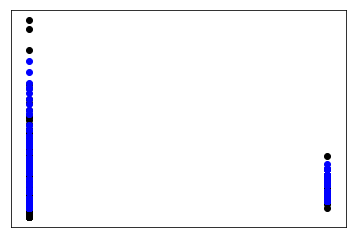

In [134]:
# Print and plot results
import matplotlib.pyplot as plt
%matplotlib inline

# The coefficients
print('Coefficients: \n', reg.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % np.mean((reg.predict(X_test) - y_test) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % reg.score(X_test, y_test))

# Plot outputs
plt.scatter(X_test['Loyalty Club Only'], y_test,  color='black')
plt.scatter(X_test['Loyalty Club Only'], reg.predict(X_test), color='blue')

plt.xticks(())
plt.yticks(())

plt.show()

In [124]:
df_mailing_list = pd.read_excel('p1-mailinglist.xlsx')
df_mailing_list = df_mailing_list.join(pd.get_dummies(df_mailing_list['Customer_Segment']))
df_mailing_list.head()

,Name,Customer_Segment,Customer_ID,Address,City,State,ZIP,Store_Number,Avg_Num_Products_Purchased,#_Years_as_Customer,Score_No,Score_Yes,Credit Card Only,Loyalty Club Only,Loyalty Club and Credit Card,Store Mailing List
0,A Giametti,Loyalty Club Only,2213,5326 S Lisbon Way,Centennial,CO,80015,105,3,0.2,0.694964,0.305036,0,1,0,0
1,Abby Pierson,Loyalty Club and Credit Card,2785,4344 W Roanoke Pl,Denver,CO,80236,101,6,0.6,0.527275,0.472725,0,0,1,0
2,Adele Hallman,Loyalty Club Only,2931,5219 S Delaware St,Englewood,CO,80110,101,7,0.9,0.421118,0.578882,0,1,0,0
3,Alejandra Baird,Loyalty Club Only,2231,2301 Lawrence St,Denver,CO,80205,103,2,0.6,0.694862,0.305138,0,1,0,0
4,Alice Dewitt,Loyalty Club Only,2530,5549 S Hannibal Way,Centennial,CO,80015,104,4,0.5,0.612294,0.387706,0,1,0,0


In [127]:
feature_names = ['Loyalty Club Only',
                 'Loyalty Club and Credit Card',
                 'Store Mailing List',
                 'Avg_Num_Products_Purchased']

In [128]:
df_mailing_list['Predicted_Average_Sale_Amount'] = reg.predict(df_mailing_list[feature_names])

In [129]:
df_mailing_list.head()

,Name,Customer_Segment,Customer_ID,Address,City,State,ZIP,Store_Number,Avg_Num_Products_Purchased,#_Years_as_Customer,Score_No,Score_Yes,Credit Card Only,Loyalty Club Only,Loyalty Club and Credit Card,Store Mailing List,Predicted_Average_Sale_Amount
0,A Giametti,Loyalty Club Only,2213,5326 S Lisbon Way,Centennial,CO,80015,105,3,0.2,0.694964,0.305036,0,1,0,0,351.795907
1,Abby Pierson,Loyalty Club and Credit Card,2785,4344 W Roanoke Pl,Denver,CO,80236,101,6,0.6,0.527275,0.472725,0,0,1,0,998.643029
2,Adele Hallman,Loyalty Club Only,2931,5219 S Delaware St,Englewood,CO,80110,101,7,0.9,0.421118,0.578882,0,1,0,0,628.793150
3,Alejandra Baird,Loyalty Club Only,2231,2301 Lawrence St,Denver,CO,80205,103,2,0.6,0.694862,0.305138,0,1,0,0,282.546596
4,Alice Dewitt,Loyalty Club Only,2530,5549 S Hannibal Way,Centennial,CO,80015,104,4,0.5,0.612294,0.387706,0,1,0,0,421.045218


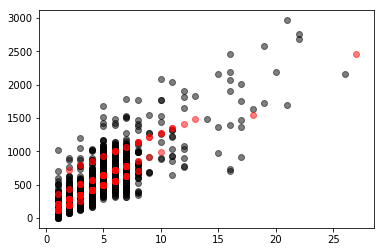

In [130]:
plt.figure()
plt.scatter(df['Avg_Num_Products_Purchased'], df['Avg_Sale_Amount'], color='black', alpha=0.5)
plt.scatter(df_mailing_list['Avg_Num_Products_Purchased'], df_mailing_list['Predicted_Average_Sale_Amount'], color='red', alpha=0.5)

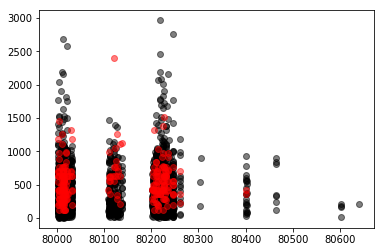

In [79]:
plt.figure()
plt.scatter(df['ZIP'], df['Avg_Sale_Amount'], color='black', alpha=0.5)
plt.scatter(df_mailing_list['ZIP'], df_mailing_list['Predicted_Average_Sale_Amount'], color='red', alpha=0.5)

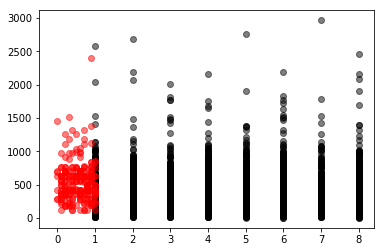

In [80]:
plt.figure()
plt.scatter(df['#_Years_as_Customer'], df['Avg_Sale_Amount'], color='black', alpha=0.5)
plt.scatter(df_mailing_list['#_Years_as_Customer'], df_mailing_list['Predicted_Average_Sale_Amount'], color='red', alpha=0.5)

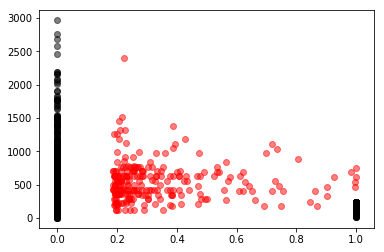

In [83]:
plt.figure()
plt.scatter(df['Responded_to_Last_Catalog'], df['Avg_Sale_Amount'], color='black', alpha=0.5)
plt.scatter(df_mailing_list['Score_Yes'], df_mailing_list['Predicted_Average_Sale_Amount'], color='red', alpha=0.5)

In [45]:
df_mailing_list['Predicted_Revenue'] = df_mailing_list['Predicted_Average_Sale_Amount']*df_mailing_list['Score_Yes']

In [46]:
df_mailing_list.head()

,Name,Customer_Segment,Customer_ID,Address,City,State,ZIP,Store_Number,Avg_Num_Products_Purchased,#_Years_as_Customer,Score_No,Score_Yes,Credit Card Only,Loyalty Club Only,Loyalty Club and Credit Card,Store Mailing List,Predicted_Average_Sale_Amount,Predicted_Revenue
0,A Giametti,Loyalty Club Only,2213,5326 S Lisbon Way,Centennial,CO,80015,105,3,0.2,0.694964,0.305036,0,1,0,0,349.0000,106.457497
1,Abby Pierson,Loyalty Club and Credit Card,2785,4344 W Roanoke Pl,Denver,CO,80236,101,6,0.6,0.527275,0.472725,0,0,1,0,973.7500,460.315518
2,Adele Hallman,Loyalty Club Only,2931,5219 S Delaware St,Englewood,CO,80110,101,7,0.9,0.421118,0.578882,0,1,0,0,628.6250,363.899603
3,Alejandra Baird,Loyalty Club Only,2231,2301 Lawrence St,Denver,CO,80205,103,2,0.6,0.694862,0.305138,0,1,0,0,279.1250,85.171591
4,Alice Dewitt,Loyalty Club Only,2530,5549 S Hannibal Way,Centennial,CO,80015,104,4,0.5,0.612294,0.387706,0,1,0,0,418.9375,162.424522


In [138]:
print "Total Predicted Revenue: ${:0.2f}".format(np.sum(df_mailing_list['Predicted_Revenue']))

Total Predicted Revenue: $46901.72
